## Exploring survival on the Titanic

Homework for Applied Computational Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

import seaborn as sns

### Descriptive Statistics


In [2]:
df = pd.read_csv('titanic (2).csv')
display(df.shape)
display(df.info())
#df.head()

(891, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


None

#### Minimun and maximum age of passengers

In [3]:
min_age = df['age'].min()
max_age = df['age'].max()

print(f'The minimum age is {min_age} and the maximum age is {max_age}.')

The minimum age is 0.42 and the maximum age is 80.0.


#### Minimum and maximum fares

In [4]:


min_fare = df['fare'].min()
max_fare = df['fare'].max()

print(f'The minimum fare is {min_fare} and the maximum fare is {max_fare:.2f}.')

The minimum fare is 0.0 and the maximum fare is 512.33.


#### Fare percentiles

In [5]:


# there are no nan values for fare
fare = df.fare.dropna()

# calculate the needed percentile
a = np.percentile(fare, 80)
b = np.percentile(fare, 90)
c = np.percentile(fare, 99)
print(f' The 80th percentile is {a:.2f}, the 90th percentile is {b:.2f}, and the 99th percentile is {c:.2f}.')

 The 80th percentile is 39.69, the 90th percentile is 77.96, and the 99th percentile is 249.01.


#### Age quartiles

 The first quartile value is 20, the second quartile value is 28, and the third quartile value is 38.


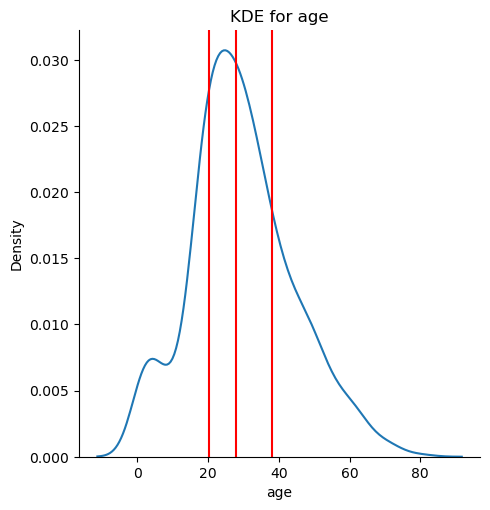

In [6]:

# remove nan values
df1 = df.copy()
df1 = df1.dropna(axis=0, subset=['age'])
age = df1['age']

x = np.quantile(age, 0.25)
y = np.quantile(age, 0.50)
z = np.quantile(age, 0.75)

print(f' The first quartile value is {x:.0f}, the second quartile value is {y:.0f}, and the third quartile value is {z:.0f}.')

# density plot
#sns.kdeplot(data=age)
ax = sns.displot(age, kind='kde') 
plt.axvline(x, 0, 1, color='r')
plt.axvline(y, 0, 1, color='r')
plt.axvline(z, 0, 1, color='r')
plt.title('KDE for age')
plt.show()



#### Measures of Central Tendency

* Mean age

In [7]:
mean_= np.mean(age)
print(f'The mean age is {mean_:.0f}.')

The mean age is 30.


* Median age

In [8]:
median_= np.median(age)
print(f'The median age is {median_:.0f}.')

The median age is 28.


* Mode of class

In [9]:
# class has no nan values

mod = df["class"].mode()
print(f'The mode of class is {mod}')

The mode of class is 0    Third
Name: class, dtype: object


#### Measures of Spread/Dispersion

* Age variance and standard deviation

In [10]:
var = np.var(age, ddof=1)
stdev = np.std(age,ddof=1)

print(f'The unbiased sample variance is {var:.0f} and sample standard deviation is {stdev:.0f}.')

The unbiased sample variance is 211 and sample standard deviation is 15.


* Age range

In [11]:
#age.describe()

range_age = age.max() - age.min()
print(f'The range of age is {range_age:.2f} or {range_age:.0f}.')

The range of age is 79.58 or 80.


* Age interquartile range

In [12]:
iqr = np.percentile(age, 75) - np.percentile(age, 25)
print(f'The IQR is {iqr} or {iqr:.0f}.')

The IQR is 17.875 or 18.


#### Higher Moments

* Age skewness

In [13]:

sku = stats.skew(age, bias=False)
print(f'The unbiased skewness of age is {sku:.04}.')

The unbiased skewness of age is 0.3891.


* Age kurtosis

In [14]:
kurt = stats.kurtosis(age, fisher=True, bias=False)
print(f'The unbiased sample kurtosis of age is {kurt:.4f}.')

The unbiased sample kurtosis of age is 0.1783.


### Exploratory Data Analysis


#### In the Titanic movie, they let women and children on the lifeboats first. One would then be lead to believe that women and children had a higher chance of survival. 

The data supports this idea. Data shows that there are more women and children passenger survivors than men passengers. 

In [15]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [16]:
print(df.groupby('who')['survived'].value_counts(normalize = True)) 
print(df.groupby(['survived','who'])['survived'].count())


who    survived
child  1           0.590361
       0           0.409639
man    0           0.836127
       1           0.163873
woman  1           0.756458
       0           0.243542
Name: survived, dtype: float64
survived  who  
0         child     34
          man      449
          woman     66
1         child     49
          man       88
          woman    205
Name: survived, dtype: int64


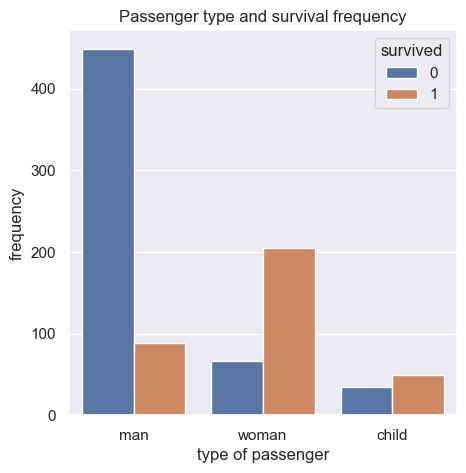

In [17]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(data=df, x="who", hue="survived")
plt.title("Passenger type and survival frequency")
plt.xlabel('type of passenger')
plt.ylabel('frequency')
plt.show()

#### Also in the movie, you can see rich people arguing that they should be allowed on the lifeboats first. 

In the first chart, ticket class is used as proxy for the socio economic status of passengers. Those who purchased first class tickets are considered "rich". Plotting the categorical data with the survived dummy variable, it shows that rich passengers have higher survival than passengers with third class tickets who are considered poor.

In the second chart, a categorical grouping of the fare prices is created. Passengers able to pay very high fare prices are considered rich. These passengers also have higher survival.

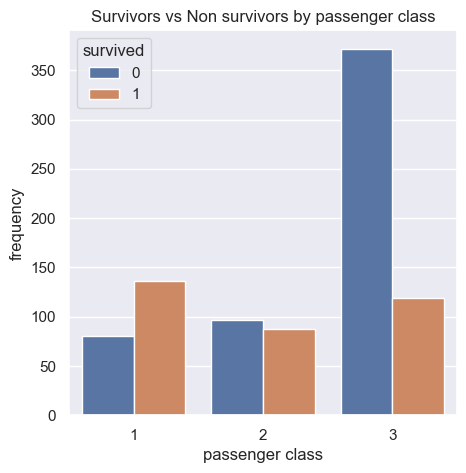

In [18]:

sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(data=df, x="pclass", hue="survived")
plt.title("Survivors vs Non survivors by passenger class")
plt.xlabel('passenger class')
plt.ylabel('frequency')
plt.show()

In [19]:
pd.qcut(fare, 4).value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: fare, dtype: int64

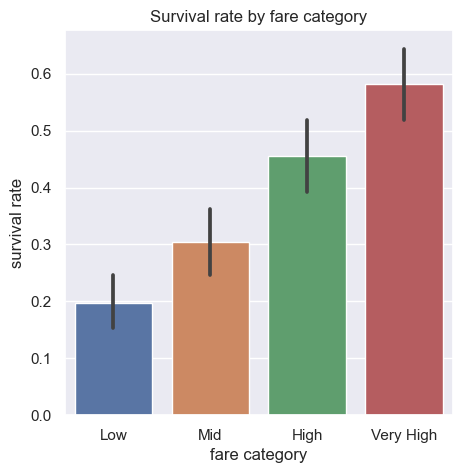

In [20]:
sns.set(rc = {'figure.figsize':(5,5)})
fare_bin = pd.qcut(df['fare'], 4, labels = ['Low', 'Mid', 'High', 'Very High'])
sns.barplot(x=fare_bin, y=df['survived'])
plt.title('Survival rate by fare category')
plt.ylabel('survival rate')
plt.xlabel('fare category')
plt.show()

#### One could make the argument that young people should be let on the lifeboats first, since they have more of life to look forward to! Did a young person have a better chance of surviving the incident compared to an old person?


Following UN definition of [young people](https://www.un.org/en/global-issues/youth), it will be those passengers with ages 24 and younger and [old people](https://emergency.unhcr.org/entry/43935/older-persons) are those that are above 60 years old. We find that young passengers have higher survival rate than old or senior citizen passengers.

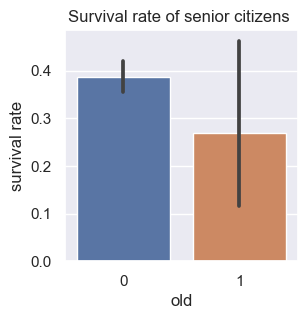

In [21]:
sns.set(rc = {'figure.figsize':(3,3)})
df['old'] = df['age'].apply(lambda x : 1 if x>59 else 0)
sns.barplot(x=df['old'] , y=df['survived'])
plt.title('Survival rate of senior citizens ')
plt.ylabel('survival rate')
plt.show()

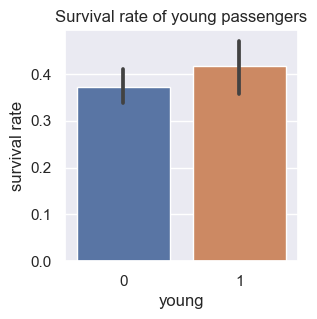

In [22]:
sns.set(rc = {'figure.figsize':(3,3)})
df['young'] = df['age'].apply(lambda x : 1 if x<24 else 0)
sns.barplot(x=df['young'] , y=df['survived'])
plt.title('Survival rate of young passengers')
plt.ylabel('survival rate')
plt.show()

In [23]:
print('Survival rate of passengers above age 60:',
      round(len(df[(df['age']>59) & (df['survived']==True)])/len(df[(df['age']>59)])*100,1),'%')
print('Survival rate of passengers aged 24 and below:',
      round(len(df[(df['age']<=24) & (df['survived']==True)])/len(df[(df['age']<=24)])*100,1),'%')

Survival rate of passengers above age 60: 26.9 %
Survival rate of passengers aged 24 and below: 42.6 %


#### Survival rate of families on board

The number of families aboard the Titanic is estimated by first, creating a new column family which is the sum of parch and sibsp columns. 

sibsp = no of siblings / spouses aboard the Titanic	
parch =	no of parents / children aboard the Titanic	

Then taking the sum of family with values equal to or greater than 1, we get that estimated number of families on board to be 354. Moreover, smaller family sizes have higher chances of survival.

In [24]:
df['family'] = df['parch'] + df['sibsp']
fam = (df['family'] >=1).sum()
print(f'The estimated number of families on board the Titanic is {fam}.')

The estimated number of families on board the Titanic is 354.


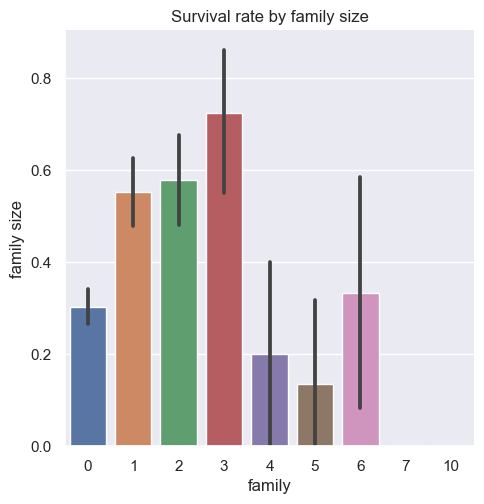

In [25]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.catplot(x = "family", y="survived", data=df, kind="bar",height=5)
plt.title('Survival rate by family size')
plt.ylabel("survival rate")
plt.ylabel("family size")
plt.show()

#### Survival rate of passengers travelling alone

It looks like passengers traveling alone have a lower survival rate. Lonely travelers have a 30.4% chance of survival while the those traveling with companions have 50.6% chances of survival.

Survival rate of alone: 30.4 %
Survival rate of not alone: 50.6 %


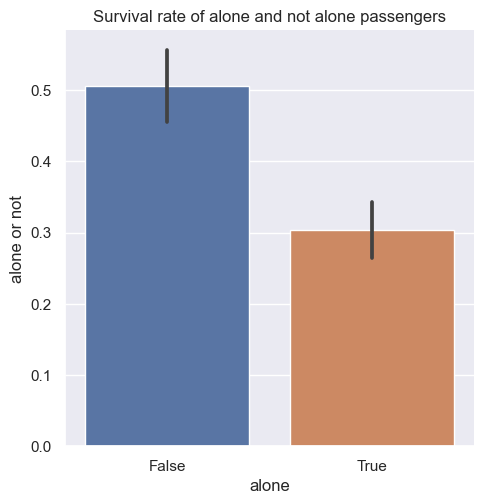

In [26]:
print('Survival rate of alone:',
     round(len(df[(df['alone']==True) & (df['survived']==True)])/len(df[(df['alone']==True)])*100,1),'%')
print('Survival rate of not alone:',
      round(len(df[(df['alone']==False) & (df['survived']==True)])/len(df[(df['alone']==False)])*100,1),'%')

sns.set(rc = {'figure.figsize':(5,5)})
sns.catplot(x = "alone", y="survived", data=df, kind="bar",height=5)
plt.title('Survival rate of alone and not alone passengers')
plt.ylabel("survival rate")
plt.ylabel("alone or not")
plt.show()

Pclass 1 survivors that are alone: 53.2 %
Pclass 1 survivors that are not alone: 72.9 %
Pclass 2 survivors that are alone: 34.6 %
Pclass 2 survivors that are not alone: 85.0 %
Pclass 3 survivors that are alone: 21.3 %
Pclass 3 survivors that are not alone: 29.9 %


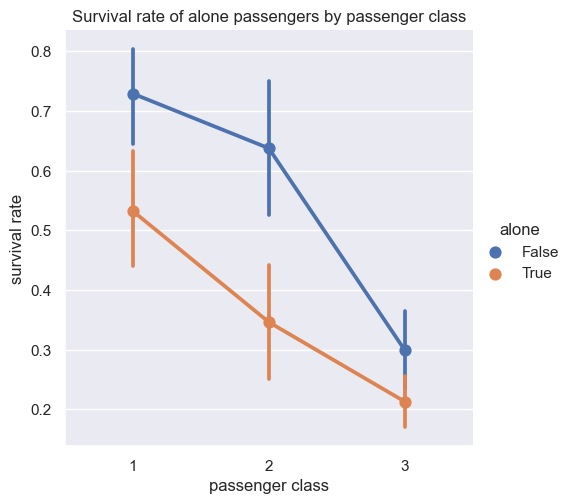

In [27]:
print('Pclass 1 survivors that are alone:', round(len(df[(df['pclass']==1) & \
    (df['alone']==True) & (df['survived']==True)])/
    len(df[(df['pclass']==1) & (df['alone']==True)])*100,1), '%')
print('Pclass 1 survivors that are not alone:', round(len(df[(df['pclass']==1) & \
    (df['alone']==False) & (df['survived']==True)])/
    len(df[(df['pclass']==1) & (df['alone']==False)])*100,1), '%')
print('Pclass 2 survivors that are alone:', round(len(df[(df['pclass']==2) & \
    (df['alone']==True) & (df['survived']==True)])/
    len(df[(df['pclass']==2) & (df['alone']==True)])*100,1), '%')
print('Pclass 2 survivors that are not alone:', round(len(df[(df['pclass']==2) & \
    (df['alone']==True) & (df['survived']==False)])/
    len(df[(df['pclass']==2) & (df['alone']==False)])*100,1), '%')
print('Pclass 3 survivors that are alone:', round(len(df[(df['pclass']==3) & \
    (df['alone']==True) & (df['survived']==True)])/
    len(df[(df['pclass']==3) & (df['alone']==True)])*100,1), '%')
print('Pclass 3 survivors that are not alone:', round(len(df[(df['pclass']==3) & \
    (df['alone']==False) & (df['survived']==True)])/
    len(df[(df['pclass']==3) & (df['alone']==False)])*100,1), '%')

sns.set(rc = {'figure.figsize':(3,3)})
sns.catplot(x='pclass',y='survived',hue='alone', kind='point', data=df)
plt.title('Survival rate of alone passengers by passenger class')
plt.ylabel("survival rate")
plt.xlabel("passenger class")
plt.show()


This is true even if the passenger is considered rich (bought first class ticket).
The rich and lonely passenger's chances of survival is 53.2 %, while it is 72.9% for the rich and not alone.

Survivors that are female and alone: 78.6 %
Survivors that are female and not alone: 71.3 %
Survivors that are male and alone: 15.6 %
Survivors that are male and not alone: 27.1 %


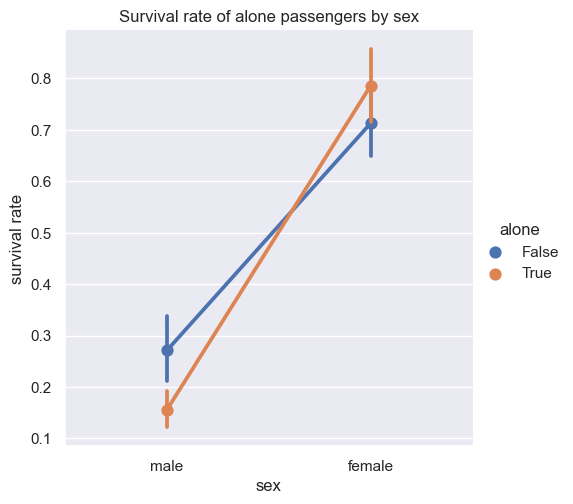

In [28]:
print('Survivors that are female and alone:', round(len(df[(df['sex']=='female') & \
    (df['alone']==True) & (df['survived']==True)])/
    len(df[(df['sex']=='female') & (df['alone']==True)])*100,1), '%')
print('Survivors that are female and not alone:', round(len(df[(df['sex']=='female') & \
    (df['alone']==False) & (df['survived']==True)])/
    len(df[(df['sex']=='female') & (df['alone']==False)])*100,1), '%')
print('Survivors that are male and alone:', round(len(df[(df['sex']=='male') & \
    (df['alone']==True) & (df['survived']==True)])/
    len(df[(df['sex']=='male') & (df['alone']==True)])*100,1), '%')
print('Survivors that are male and not alone:', round(len(df[(df['sex']=='male') & \
    (df['alone']==False) & (df['survived']==True)])/
    len(df[(df['sex']=='male') & (df['alone']==False)])*100,1), '%')

sns.set(rc = {'figure.figsize':(3,3)})
sns.catplot(x='sex',y='survived',hue='alone', kind='point', data=df)
plt.title('Survival rate of alone passengers by sex')
plt.ylabel("survival rate")
plt.xlabel("sex")
plt.show()

Nevertheless, if you are a lonely female passenger, you have a higher survival rate than none lonely female passengers although the difference is small. Female lonely travelers survival rate is 78.6% and female travelers with companion/s is 71.3 %.

So it does not seem bad to be a lonely female traveler.